In [175]:
import Constant
import utils
import re
import os.path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import AutoMinorLocator,LogLocator,MultipleLocator,FuncFormatter
#-------- 画图信息设置 ---------
plt.ion()
plt.rcParams["font.sans-serif"]=['simhei','Times New Roman']
# 英文字体
plt.rcParams["font.family"]=['Times New Roman']
plt.rcParams["font.size"]=16
plt.rcParams["axes.unicode_minus"]=False
#-------- 地址信息设置 ---------
addrSetFilePath = Constant.addressPath
outTxSetFilePath = Constant.addressOuterTxPath
tctxFilePath = Constant.tornadoTxPath
values = Constant.values

In [176]:
values= ['0.1ETH', '1ETH', '10ETH', '100ETH']
fp = 'Logs/'
fd = 'ethbins.csv'
total_bins = []
binsnum = 50
for value in values:
    for addr_dir in os.listdir(addrSetFilePath):
        a = addr_dir.split('_')[0]
        if a == value:
            df = utils.readCsvFile(addrSetFilePath+addr_dir,0)
    print("addr len:",len(df))

    #活跃度区间
    actdf = pd.DataFrame(df, columns=["Cnt","Inter_avg"])
    actdf = actdf.loc[(actdf['Cnt'] != 0) & (actdf['Cnt'] != 1) & actdf['Inter_avg']!=0]
    actdf['activity'] = actdf['Cnt']/actdf['Inter_avg'].abs()
    actdf = actdf.sort_values(by="activity",ascending=False)
    actdf = actdf.drop_duplicates()
    print("addr len:",len(actdf))
    groups,bin_edges = pd.qcut(actdf.activity,binsnum,retbins = True)
    pd.set_option('expand_frame_repr', False)
    bins = bin_edges.tolist()
    bins = [float('{:.3e}'.format(i)) for i in bins]
    print(value," 活跃度区间",bins)
    total_bins.append(bins)

    #NGP区间
    gasdf = pd.DataFrame(df, columns=["Cnt","NorGasPri_avg"])
    gasdf = gasdf.loc[(gasdf['Cnt'] != 0) & (gasdf['Cnt'] != 1)]
    gasdf = gasdf.sort_values(by="NorGasPri_avg",ascending=False)
    gasdf = gasdf.drop_duplicates()
    print("addr len:",len(gasdf))
    groups,bin_edges = pd.qcut(gasdf.NorGasPri_avg,binsnum,retbins = True)
    pd.set_option('expand_frame_repr', False)
    bins = bin_edges.tolist()
    bins = [round(i,3) for i in bins]
    print(value," NGP区间",bins)
    total_bins.append(bins)
    # return bins

    # 金额区间
    valdf = pd.DataFrame(df, columns=["Cnt","Value_avg"])
    valdf = valdf.loc[(valdf['Cnt'] != 0) & (valdf['Cnt'] != 1)]
    valdf = valdf.sort_values(by="Value_avg",ascending=False)
    valdf = valdf.drop_duplicates()
    print("addr len:",len(valdf))
    groups,bin_edges = pd.qcut(valdf.Value_avg,binsnum,retbins = True, duplicates='drop')
    pd.set_option('expand_frame_repr', False)
    bins = bin_edges.tolist()
    bins = [float('{:.3f}'.format(i)) for i in bins]
    print(value," 金额区间",bins)
    total_bins.append(bins)

cf = open(fp+fd,"w+",newline='')
name=['0.1ETH_act', '0.1ETH_gas','0.1ETH_val','1ETH_act','1ETH_gas','1ETH_val', '10ETH_act','10ETH_gas','10ETH_val', '100ETH_act','100ETH_gas','100ETH_val']
print(len(total_bins),len(name))
datadict= dict()
for i, n in enumerate(name):
    datadict[n]=total_bins[i]
datadf = pd.DataFrame(datadict)
print(datadf)
datadf.to_csv(fp+fd)
# import csv
# try:
#     writer = csv.writer(cf)
#     writer.writerow(name)
#     for i in range(len(name)):
#         for j in range(binsnum):
#             writer.writerow(total_bins[i][j])
# finally:
#     cf.close()

addr len: 24396
addr len: 21016
0.1ETH  活跃度区间 [2.917e-08, 4.309e-07, 6.735e-07, 1.145e-06, 1.71e-06, 2.51e-06, 3.442e-06, 4.589e-06, 5.935e-06, 7.572e-06, 9.574e-06, 1.177e-05, 1.461e-05, 1.792e-05, 2.2e-05, 2.676e-05, 3.216e-05, 3.834e-05, 4.594e-05, 5.486e-05, 6.588e-05, 8.024e-05, 9.766e-05, 0.0001186, 0.0001428, 0.0001698, 0.0002107, 0.0002534, 0.0003096, 0.0003841, 0.0004754, 0.0005938, 0.0007314, 0.0009436, 0.001193, 0.001498, 0.001883, 0.002416, 0.00312, 0.004114, 0.005509, 0.007207, 0.009376, 0.01251, 0.01685, 0.02391, 0.03457, 0.05385, 0.09561, 0.2371, 2412000.0]
addr len: 21264
0.1ETH  NGP区间 [0.128, 0.734, 0.96, 1.113, 1.25, 1.375, 1.497, 1.619, 1.757, 1.883, 2.018, 2.141, 2.259, 2.39, 2.528, 2.674, 2.805, 2.945, 3.082, 3.215, 3.358, 3.504, 3.653, 3.795, 3.928, 4.064, 4.21, 4.354, 4.517, 4.671, 4.829, 4.995, 5.173, 5.355, 5.55, 5.731, 5.919, 6.12, 6.311, 6.529, 6.758, 6.994, 7.263, 7.559, 7.909, 8.31, 8.855, 9.453, 10.495, 12.66, 1260.562]
addr len: 20334
0.1ETH  金额区间 [0.0, 0

In [182]:
types= ['DAI','USDC', 'USDT', 'WBTC', 'cDAI']
fp = 'Logs/'
fd = 'tokenbins.csv'
total_bins = []
binsnum = 50
name = []
for t in types:
    

    #活跃度区间
    bins = Constant.ActBins[t]
    bins = [float('{:.3e}'.format(i)) for i in bins]
    print(t," 活跃度区间",bins)
    total_bins.append(bins)
    name.append(t+'_act')

    #NGP区间
    bins = Constant.GasBins[t]
    bins = [round(i,3) for i in bins]
    print(t," NGP区间",bins)
    total_bins.append(bins)
    name.append(t+'_gas')


    # 金额区间
    bins = Constant.ValBins[t]
    bins = [float('{:.3f}'.format(i)) for i in bins]
    print(t," 金额区间",bins)
    total_bins.append(bins)
    name.append(t+'_val')

import csv
with open(fp+fd,"w",newline='') as cf:
    writer = csv.writer(cf)
    for row in total_bins:
        print(row)
        writer.writerow(row)

# datadict= dict()
# for i, n in enumerate(name):
#     datadict[n]=total_bins[i]
# datadf = pd.DataFrame(datadict)
# print(datadf)
# datadf.to_csv(fp+fd)

DAI  活跃度区间 [0.0, 1e-06, 3e-06, 4e-06, 6e-06, 1e-05, 1.5e-05, 2.5e-05, 3e-05, 5e-05, 7e-05, 9e-05, 0.0002, 0.0004, 0.001, 0.002, 0.005, 0.008, 0.01, 0.03, 60.0]
DAI  NGP区间 [0, 0.6, 1.2, 1.5, 1.8, 2, 2.3, 2.6, 3, 3.4, 3.6, 3.9, 4.2, 4.8, 5, 6, 7, 10, 21]
DAI  金额区间 [0.0, 50.0, 80.0, 100.0, 200.0, 400.0, 560.0, 700.0, 800.0, 1300.0, 2000.0, 3500.0, 5000.0, 6000.0, 9000.0, 10000.0, 20000.0, 30000.0, 40000.0, 60000.0, 80000.0, 100000.0, 200000.0, 6000000.0]
USDC  活跃度区间 [0.0, 5e-07, 2e-06, 5e-06, 7e-06, 1e-05, 1.5e-05, 2.5e-05, 4e-05, 6e-05, 9e-05, 0.00015, 0.0002, 0.0003, 0.00055, 0.0009, 0.002, 0.004, 0.007, 0.012, 0.15]
USDC  NGP区间 [0, 0.9, 1, 1.5, 1.7, 1.9, 2.1, 2.5, 2.7, 2.9, 3.2, 3.5, 3.8, 4, 4.5, 5, 5.8, 6.5, 7.5, 30]
USDC  金额区间 [0.0, 50.0, 70.0, 80.0, 90.0, 100.0, 300.0, 500.0, 600.0, 850.0, 1000.0, 1700.0, 2500.0, 3000.0, 4000.0, 6000.0, 8000.0, 10000.0, 15000.0, 25000.0, 50000.0, 3000000.0]
USDT  活跃度区间 [0.0, 1e-06, 2e-06, 4e-06, 8e-06, 1e-05, 2e-05, 3e-05, 5e-05, 7e-05, 0.0001, 0.00

In [178]:
v_type = 'cDAI'

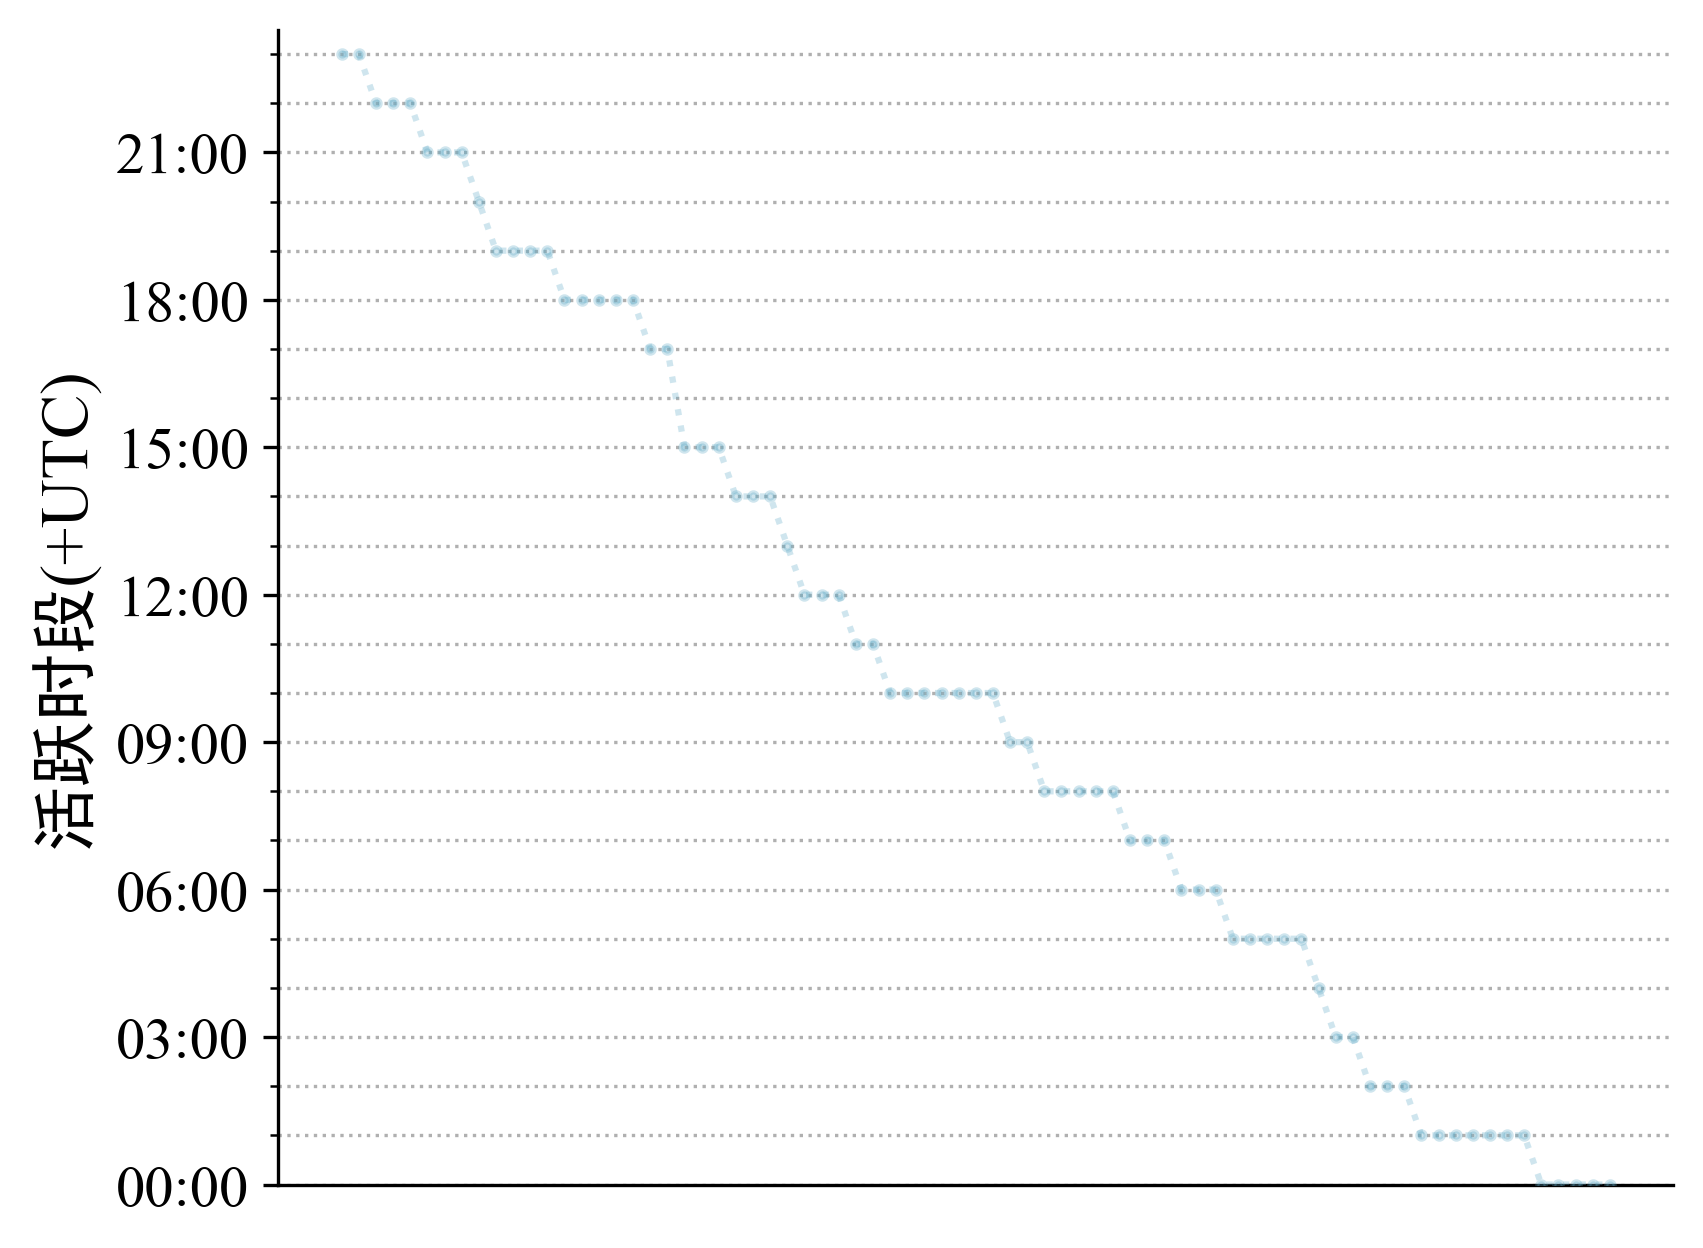

In [179]:
addrDF = pd.DataFrame()
for addr_dir in os.listdir(addrSetFilePath):
    value = addr_dir.split('_')[0]
    # if value == v_type:
    type = ''.join(re.findall(r'[A-Za-z]', value))
    if  type == v_type:
        addrDir = addr_dir
        df = utils.readCsvFile(addrSetFilePath+addr_dir,0)
        newdf = [addrDF, df]
        addrDF = pd.concat(newdf)
df = pd.DataFrame(addrDF, columns=["Zone"])
df = df.sort_values(by="Zone",ascending=False)
df = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
df = df.dropna()
plt.figure(dpi=300, figsize=(6,5))
# print(df)
# df['Zone'] = df['Zone'].apply(lambda x: str(x).zfill(2)+':00')
df.Zone.plot(color='#63acc7', alpha=0.3, linestyle=':', marker = 'o', markersize='2',markeredgewidth=1, zorder=10)

plt.xlabel = []
ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
ax.set_xticks([])
ax.set_ylabel('活跃时段(+UTC)',fontfamily=['Times New Roman','simhei'])
ax.axes.xaxis.set_visible(False)
# ax.set_yticks(np.arange(0, 24, 2))
ax.set_ylim(0,23.5)
ax.yaxis.set_major_locator(MultipleLocator(3.0))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
#设置刻度格式器
def tick(x, pos):
    return str(int(x)).zfill(2)+':00'
ax.yaxis.set_major_formatter(FuncFormatter(tick))
ax.tick_params(which = "major", labelsize=14)
ax.grid(axis='y',linestyle=':',which='both')
plt.show()


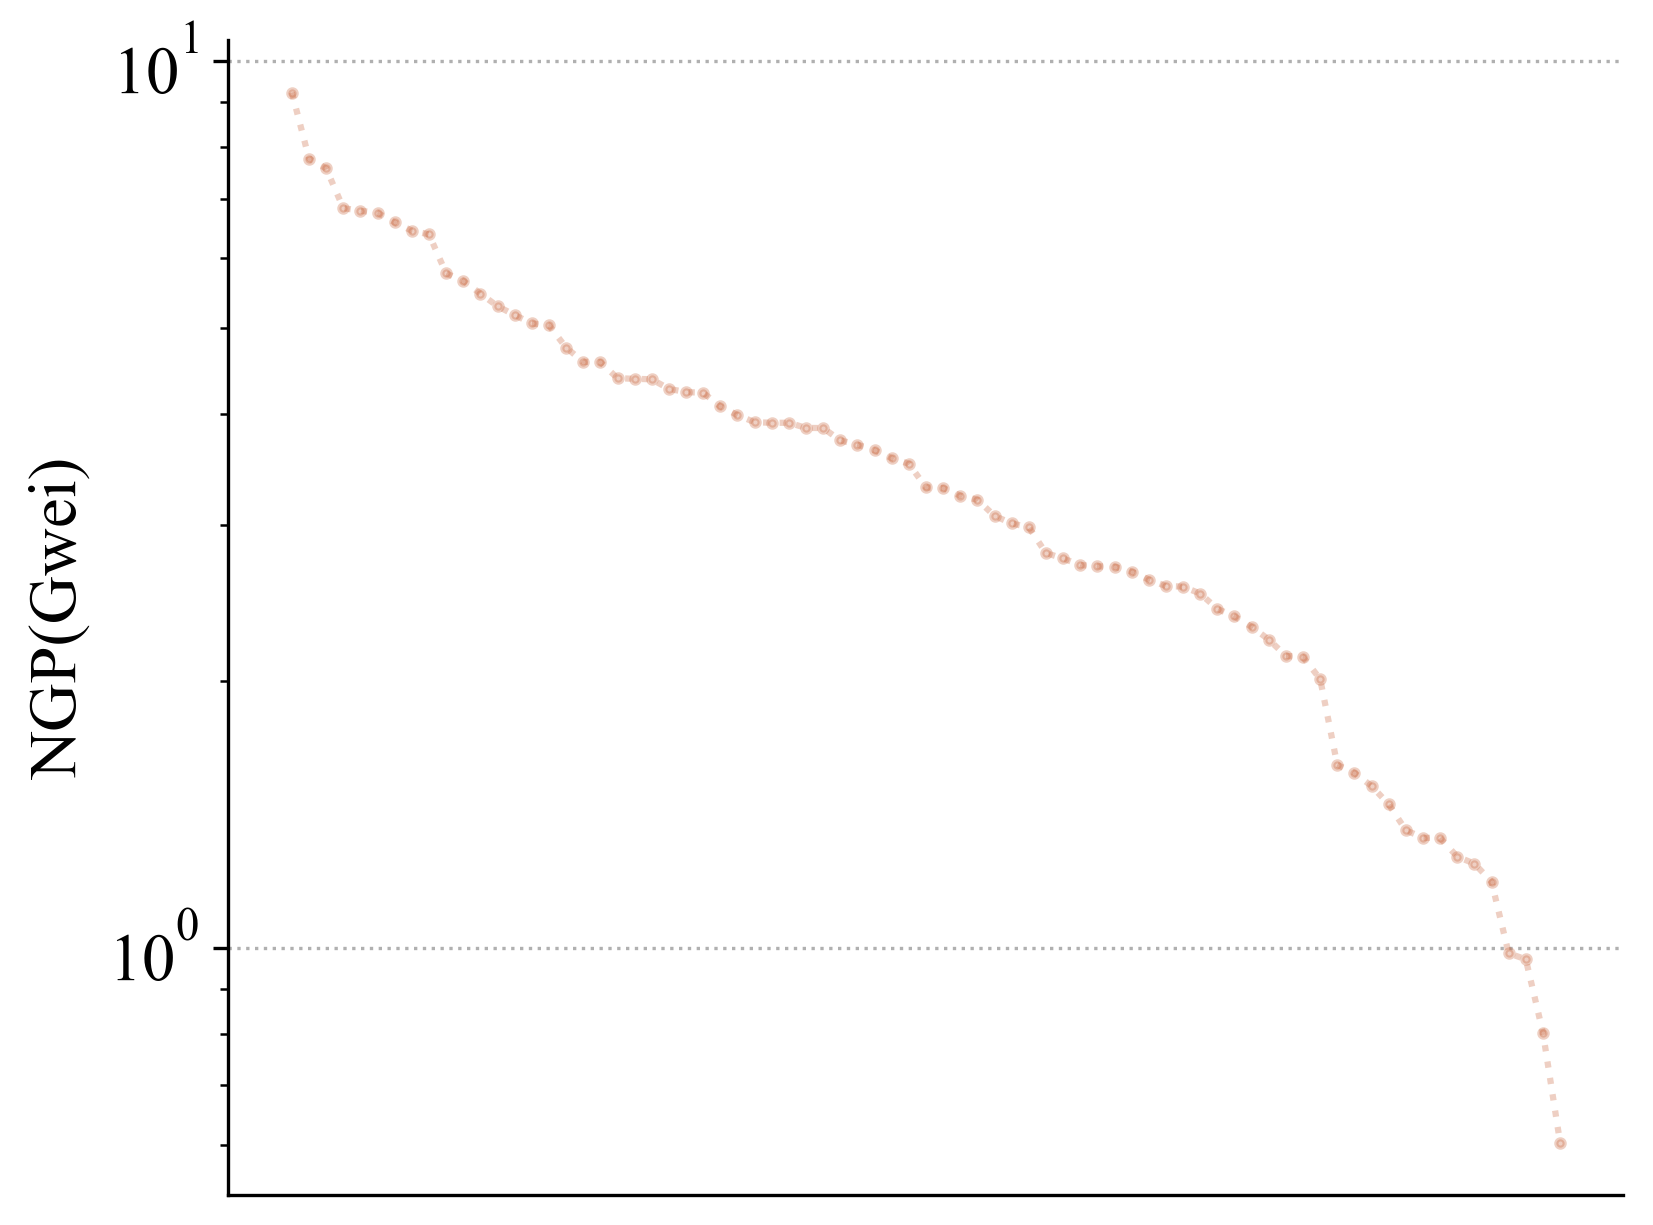

In [180]:
addrDF = pd.DataFrame()
for addr_dir in os.listdir(addrSetFilePath):
    value = addr_dir.split('_')[0]
    # if value == v_type:
    type = ''.join(re.findall(r'[A-Za-z]', value))
    if  type == v_type:
        addrDir = addr_dir
        df = utils.readCsvFile(addrSetFilePath+addr_dir,0)
        newdf = [addrDF, df]
        addrDF = pd.concat(newdf)
df = pd.DataFrame(addrDF, columns=["NorGasPri_avg"])
df = df.sort_values(by="NorGasPri_avg",ascending=False)
df = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
df = df.dropna()
plt.figure(dpi=300, figsize=(6,5))
df.NorGasPri_avg.plot(color='#c86339', alpha=0.3, linestyle=':', marker = 'o', markersize='2',markeredgewidth=1)
plt.xlabel = []
ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
ax.set_yscale("log")
ax.axes.xaxis.set_visible(False)
ax.set_ylabel('NGP(Gwei)')
ax.grid(axis='y',linestyle=':',which='major')

ax.set_xticks([])
plt.show()


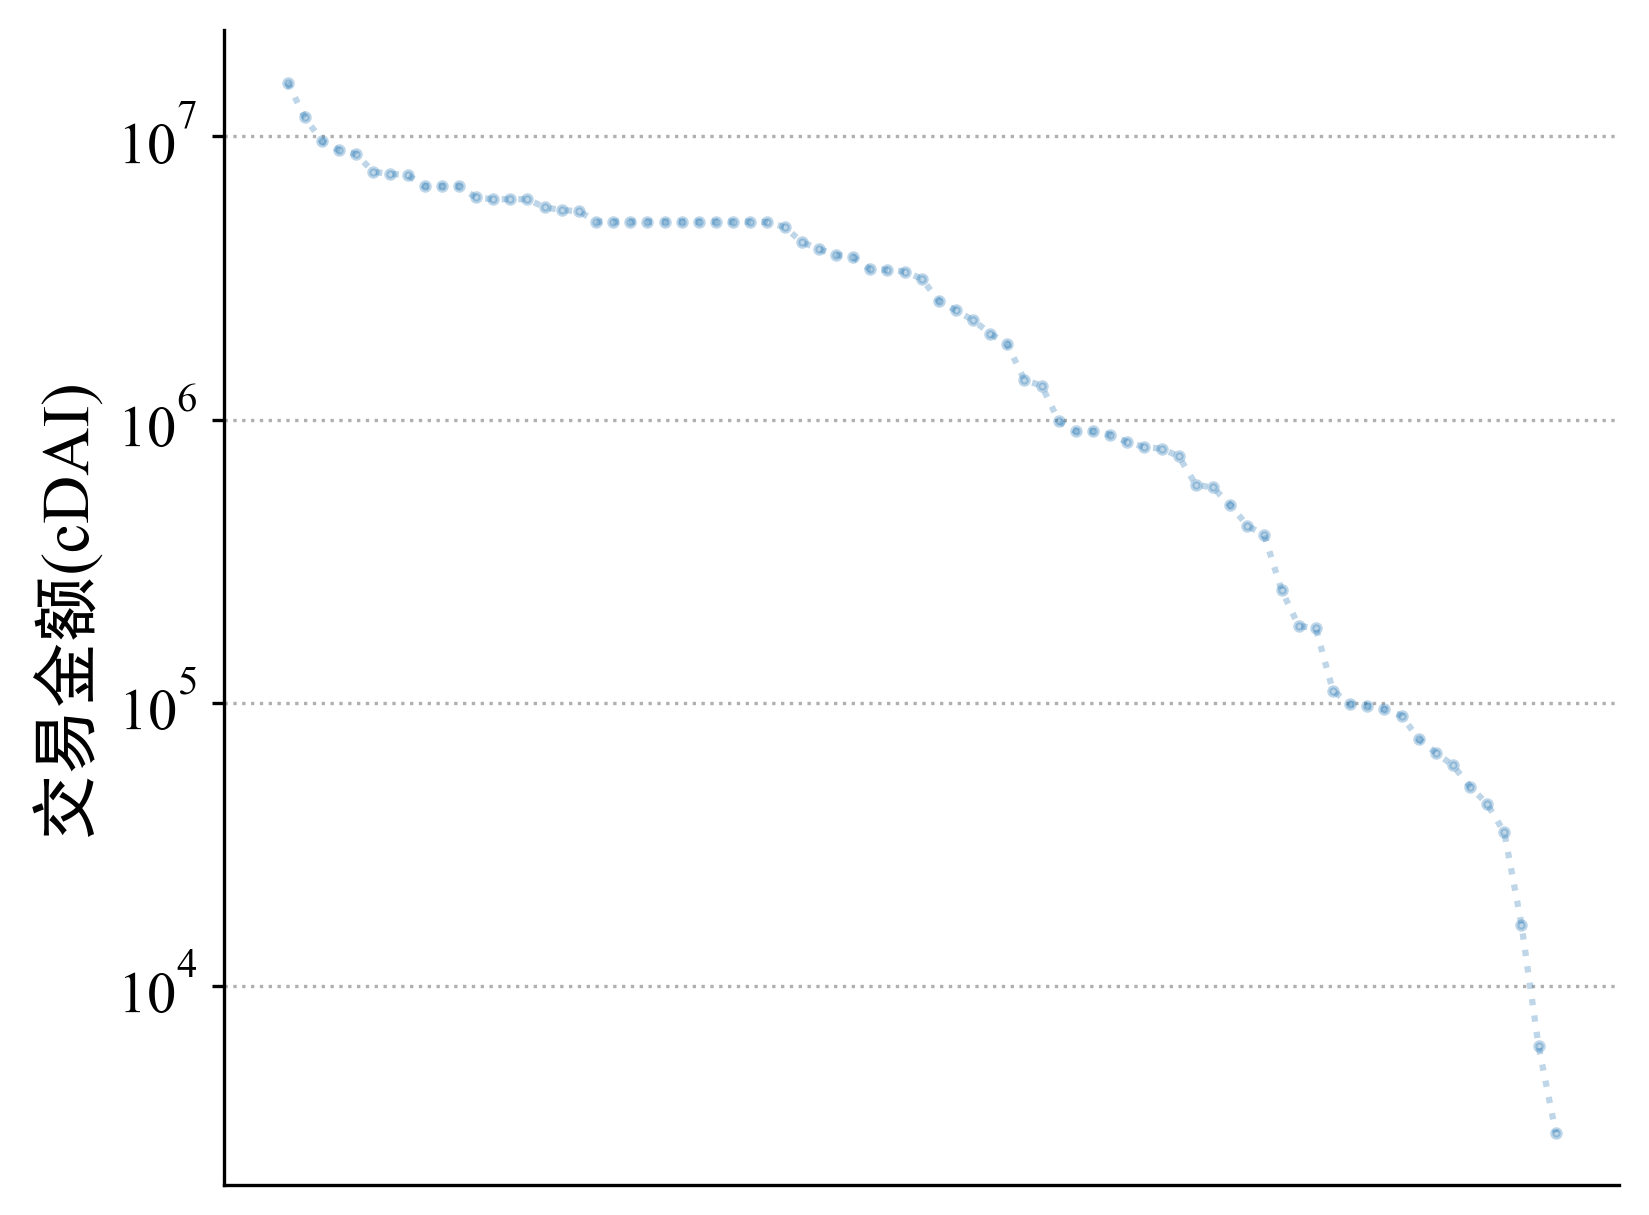

In [181]:
addrDF = pd.DataFrame()
for addr_dir in os.listdir(addrSetFilePath):
    value = addr_dir.split('_')[0]
    # if value == v_type:
    type = ''.join(re.findall(r'[A-Za-z]', value))
    if  type == v_type:
        addrDir = addr_dir
        df = utils.readCsvFile(addrSetFilePath+addr_dir,0)
        newdf = [addrDF, df]
        addrDF = pd.concat(newdf)
df = pd.DataFrame(addrDF, columns=["Value_avg"])
df = df.sort_values(by="Value_avg",ascending=False)
df = df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
df = df.dropna()
plt.figure(dpi=300, figsize=(6,5))
# print(df)
df.Value_avg.plot(color='#2878b5', alpha=0.3, linestyle=':', marker = 'o', markersize='2',markeredgewidth=1)
plt.xlabel = []
ax = plt.gca()
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
ax.set_xticks([])
ax.axes.xaxis.set_visible(False)
ax.set_yscale("log")
ax.set_ylabel('交易金额('+v_type+')',fontfamily=['Times New Roman','simhei'])
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0, numdecs=10))
ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=[1.0], numticks=100))
ax.tick_params(which = "both", labelsize=14, length=3)
# ax.yaxis.set_major_locator(MultipleLocator(3.0))
ax.grid(axis='y',linestyle=':',which='both')
plt.show()
